In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

---

## housedata

In [68]:
file_path = 'data/housedata.csv'
data = pd.read_csv(file_path)

#### Visualisation

In [69]:
df = data.copy()
df.shape
df.dtypes.value_counts() # Différentes types de données des colonnes

int64      9
object     5
float64    4
Name: count, dtype: int64

In [70]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [71]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

#### Statistiques et Filtres

In [72]:
# Counting

df['condition'].value_counts()

condition
3    2875
4    1252
5     435
2      32
1       6
Name: count, dtype: int64

In [73]:
# Sorting

df.sort_values('sqft_living')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3778,2014-07-01 00:00:00,276000.0,1.0,0.75,370,1801,1.0,0,0,5,370,0,1923,0,2508 NW 67th St,Seattle,WA 98117,USA
2919,2014-06-20 00:00:00,245000.0,1.0,0.75,380,15000,1.0,0,0,3,380,0,1963,2008,13602 8th Ave S,Burien,WA 98168,USA
2416,2014-06-12 00:00:00,280000.0,1.0,0.75,420,6720,1.0,0,0,3,420,0,1922,2008,5550 17th Ave S,Seattle,WA 98108,USA
1219,2014-05-23 00:00:00,80000.0,1.0,0.75,430,5050,1.0,0,0,2,430,0,1912,0,32215 E Rutherford St,Carnation,WA 98014,USA
4184,2014-07-09 00:00:00,150000.0,3.0,0.75,490,38500,1.5,0,0,4,490,0,1959,0,11881 Tye River Rd NE,Skykomish,WA 98288,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4575,2014-07-02 00:00:00,0.0,5.0,6.25,8020,21738,2.0,0,0,3,8020,0,2001,0,2 Crescent Key,Bellevue,WA 98006,USA
2328,2014-06-11 00:00:00,2888000.0,5.0,6.25,8670,64033,2.0,0,4,3,6120,2550,1965,2003,1291 NW Elford Dr,Seattle,WA 98177,USA
2654,2014-06-17 00:00:00,4668000.0,5.0,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA
2286,2014-06-11 00:00:00,7062500.0,5.0,4.50,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,WA 98004,USA


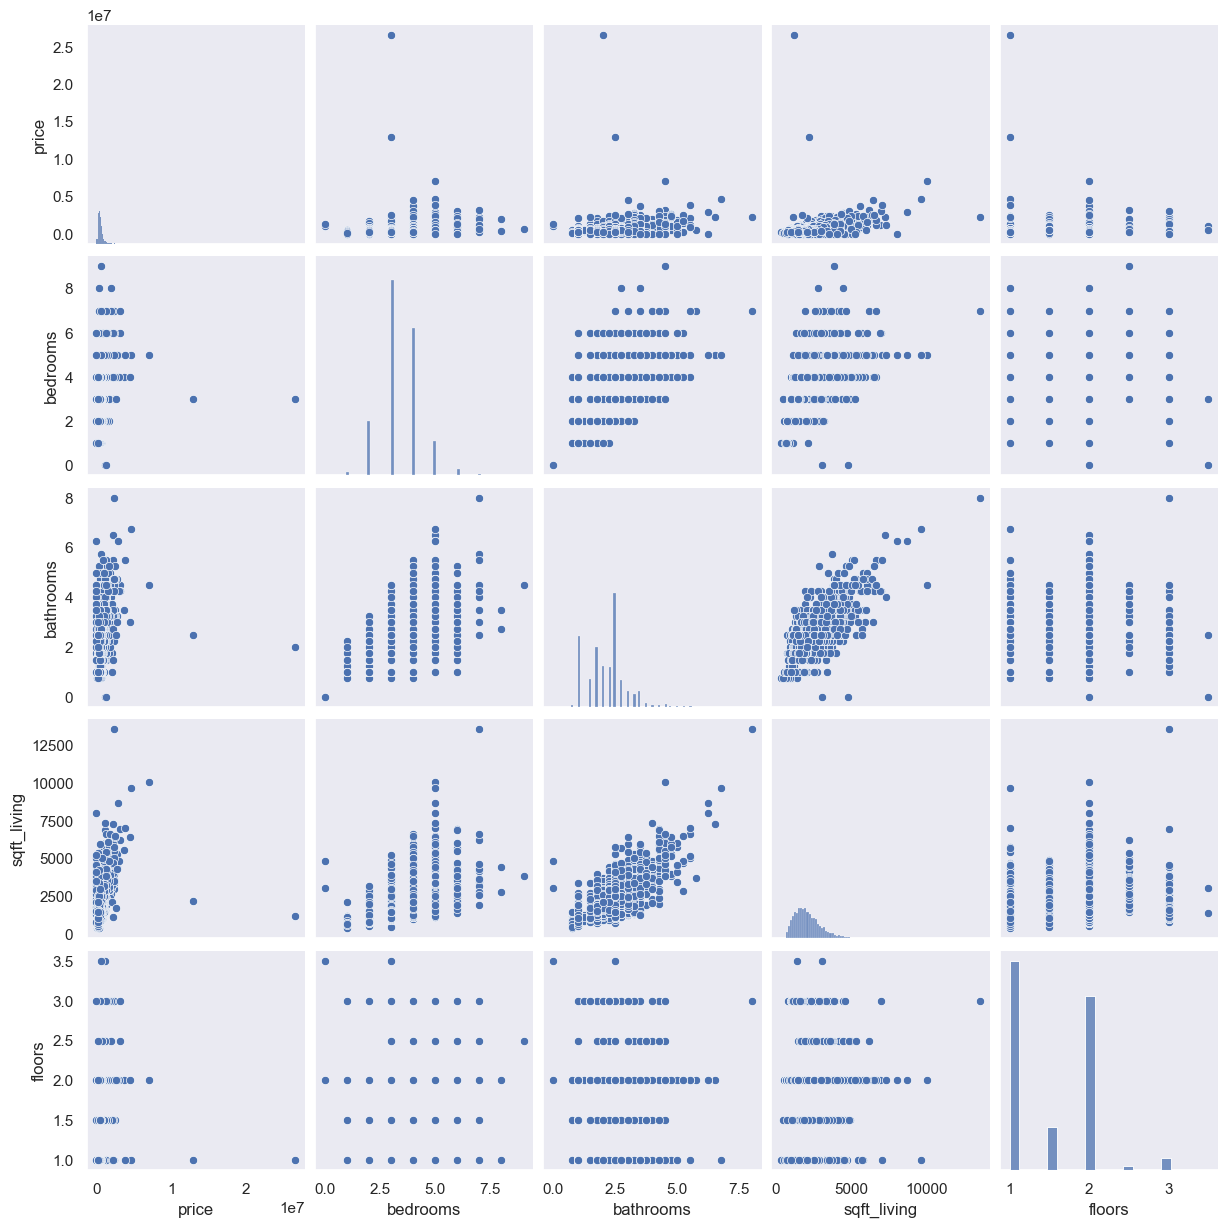

In [74]:
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living','floors']])

/var/folders/jl/05xr553n44v3_nqnn57t0f380000gn/T/ipykernel_14671/372120261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = cluster_labels


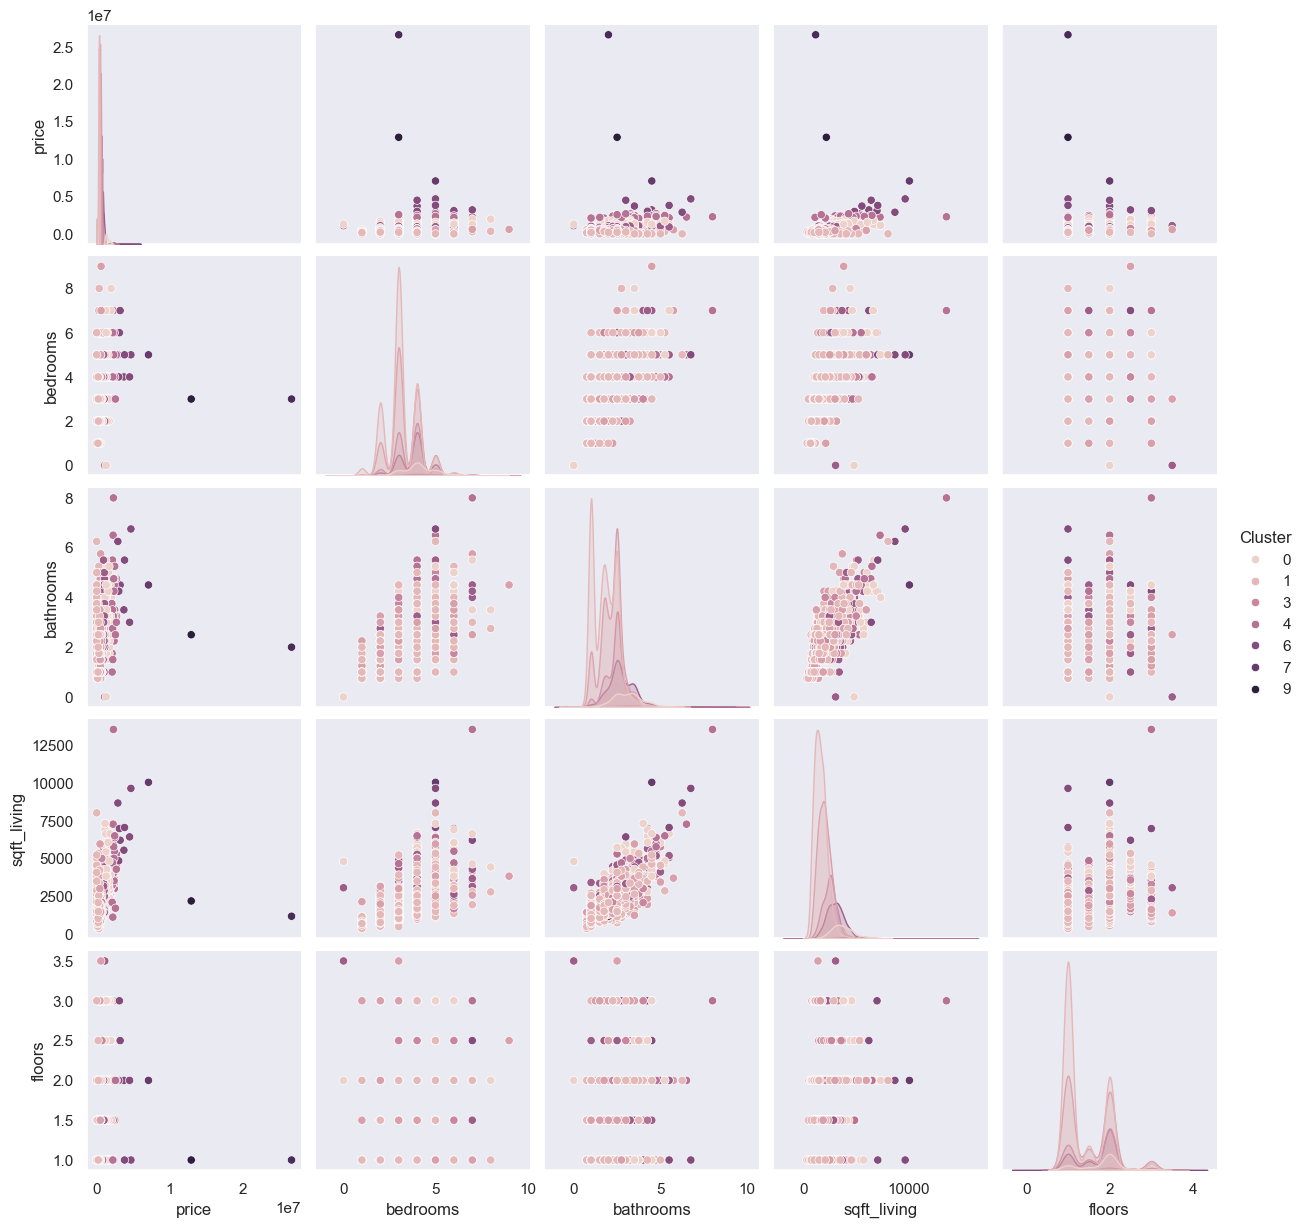

In [75]:
from sklearn.cluster import AgglomerativeClustering

new_df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living','floors']]
clustering = AgglomerativeClustering(n_clusters=10, linkage='ward')
cluster_labels = clustering.fit_predict(new_df)
new_df['Cluster'] = cluster_labels

sns.pairplot(new_df, hue='Cluster')

### Analyse de Fond :
- **Visualisation de la target** :
- **Signification des variables** :
- **Relation Variables / Target** :

In [76]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
# drop columns
numerical_df = numerical_df.drop(columns=['bathrooms', 'yr_built', 'yr_renovated', 'waterfront'])
numerical_df.describe(include='all')

,price,bedrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement
count,4.600000e+03,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2139.346957,1.485252e+04,1.512065,0.240652,3.451739,1827.265435,312.081522
std,5.638347e+05,0.908848,963.206916,3.588444e+04,0.538288,0.778405,0.677230,862.168977,464.137228
min,0.000000e+00,0.000000,370.000000,6.380000e+02,1.000000,0.000000,1.000000,370.000000,0.000000
25%,3.228750e+05,3.000000,1460.000000,5.000750e+03,1.000000,0.000000,3.000000,1190.000000,0.000000
50%,4.609435e+05,3.000000,1980.000000,7.683000e+03,1.500000,0.000000,3.000000,1590.000000,0.000000
75%,6.549625e+05,4.000000,2620.000000,1.100125e+04,2.000000,0.000000,4.000000,2300.000000,610.000000
max,2.659000e+07,9.000000,13540.000000,1.074218e+06,3.500000,4.000000,5.000000,9410.000000,4820.000000


La moyenne des prix mensuels s'élève à environ 11563.60 €, illustrant ainsi le niveau moyen des loyers dans l'échantillon. Cependant, l'écart-type significatif de 4469.08 € souligne la dispersion considérable des valeurs autour de cette moyenne. Cela suggère que les prix des loyers peuvent varier considérablement d'une propriété à une autre, ce qui pourrait être attribuable à divers facteurs tels que l'emplacement, la taille ou l'état du bien.

Un point d'intérêt notable est le prix mensuel minimum de 0 €, ce qui est inhabituel et qui est sûrement une erreur.

Enfin, le prix mensuel le plus élevé, qui est de 47186.00 €, met en lumière la présence de biens immobiliers avec des loyers très élevés dans l'échantillon. Cette valeur extrême peut être le résultat de caractéristiques uniques de la propriété ou de son emplacement.

### Analyse dataset

In [80]:
# Standardize the data
scaler = StandardScaler()
scaler.fit(numerical_df)
data_scaled = scaler.transform(numerical_df)
dataStd = pd.DataFrame(data_scaled, columns=numerical_df.columns)

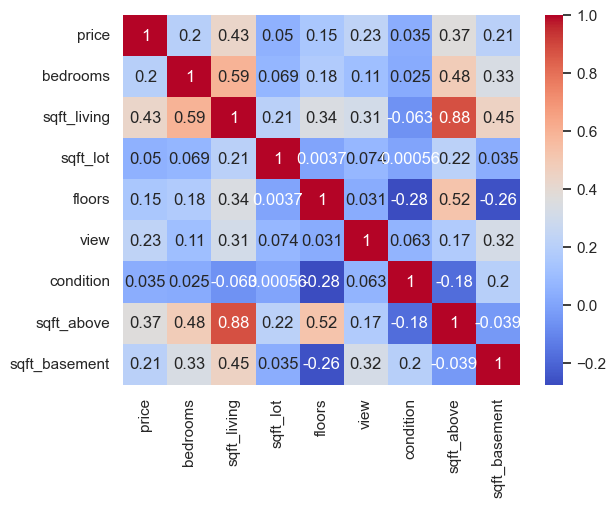

In [81]:
sns.heatmap(dataStd.corr(), annot=True, cmap='coolwarm');

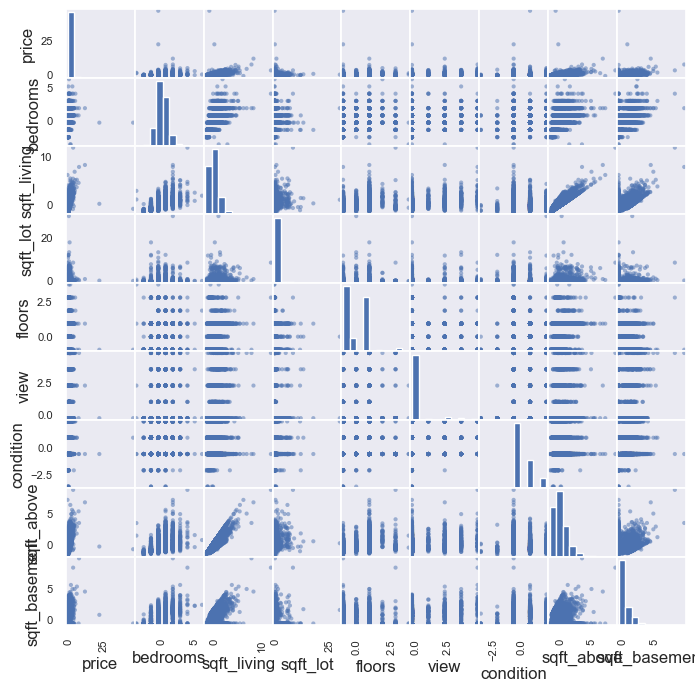

In [82]:
pd.plotting.scatter_matrix(dataStd, figsize=(8, 8));

On note que le nombre de pièces a une distribution concentrée avec des valeurs extrêmes, tandis que les prix et les surfaces présentent une large dispersion avec de nombreux points éloignés de la concentration principale, indiquant des valeurs extrêmes ou aberrantes. Le graphique inférieur droit identifie spécifiquement les valeurs aberrantes, isolant visiblement les données qui s'écartent de la tendance générale.

De plus on remarque une correlation entre la surface et prix car les points montrent globalement une tendance linéaire où y = x

### Outlier detection

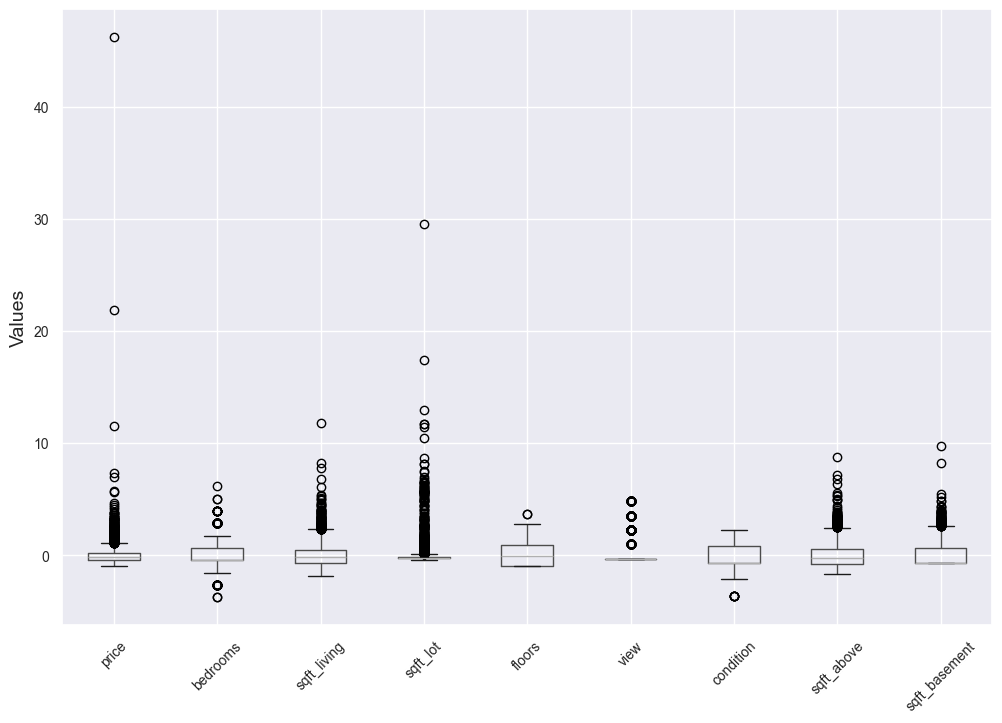

In [83]:
plt.figure(figsize=(12, 8))

dataStd.boxplot(rot=45, fontsize=10)
plt.ylabel("Values", fontsize=14)
plt.show()

Les variables "Arrondissement" et "Pièces" ont des plages de valeurs relativement étroites et moins de valeurs aberrantes, ce qui suggère une distribution plus serrée des données. En revanche, "Prix (€)", "Prix mensuel (€)" et "Surface (m²)" montrent une plus grande variabilité avec de nombreuses valeurs aberrantes, indiquant des écarts importants dans les données. La médiane semble relativement basse pour les catégories "Prix" et "Surface", ce qui pourrait indiquer une asymétrie dans la distribution des prix et des tailles des surfaces.

In [84]:
outliers_count = 0

for col in dataStd.columns:
    col_values = dataStd[col]
    z_scores = (col_values - col_values.mean()) / col_values.std()
    outliers_count += (abs(z_scores) > 3).sum()

# Display the count of lines to be removed
print(f"Total lines to be removed: {outliers_count}")

Total lines to be removed: 474


In [85]:
# Initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

isolation_forest.fit(dataStd)
outlier_predictions = isolation_forest.predict(dataStd)

outliers_count = (outlier_predictions == -1).sum()

print(f"Total outliers identified: {outliers_count}")

Total outliers identified: 230


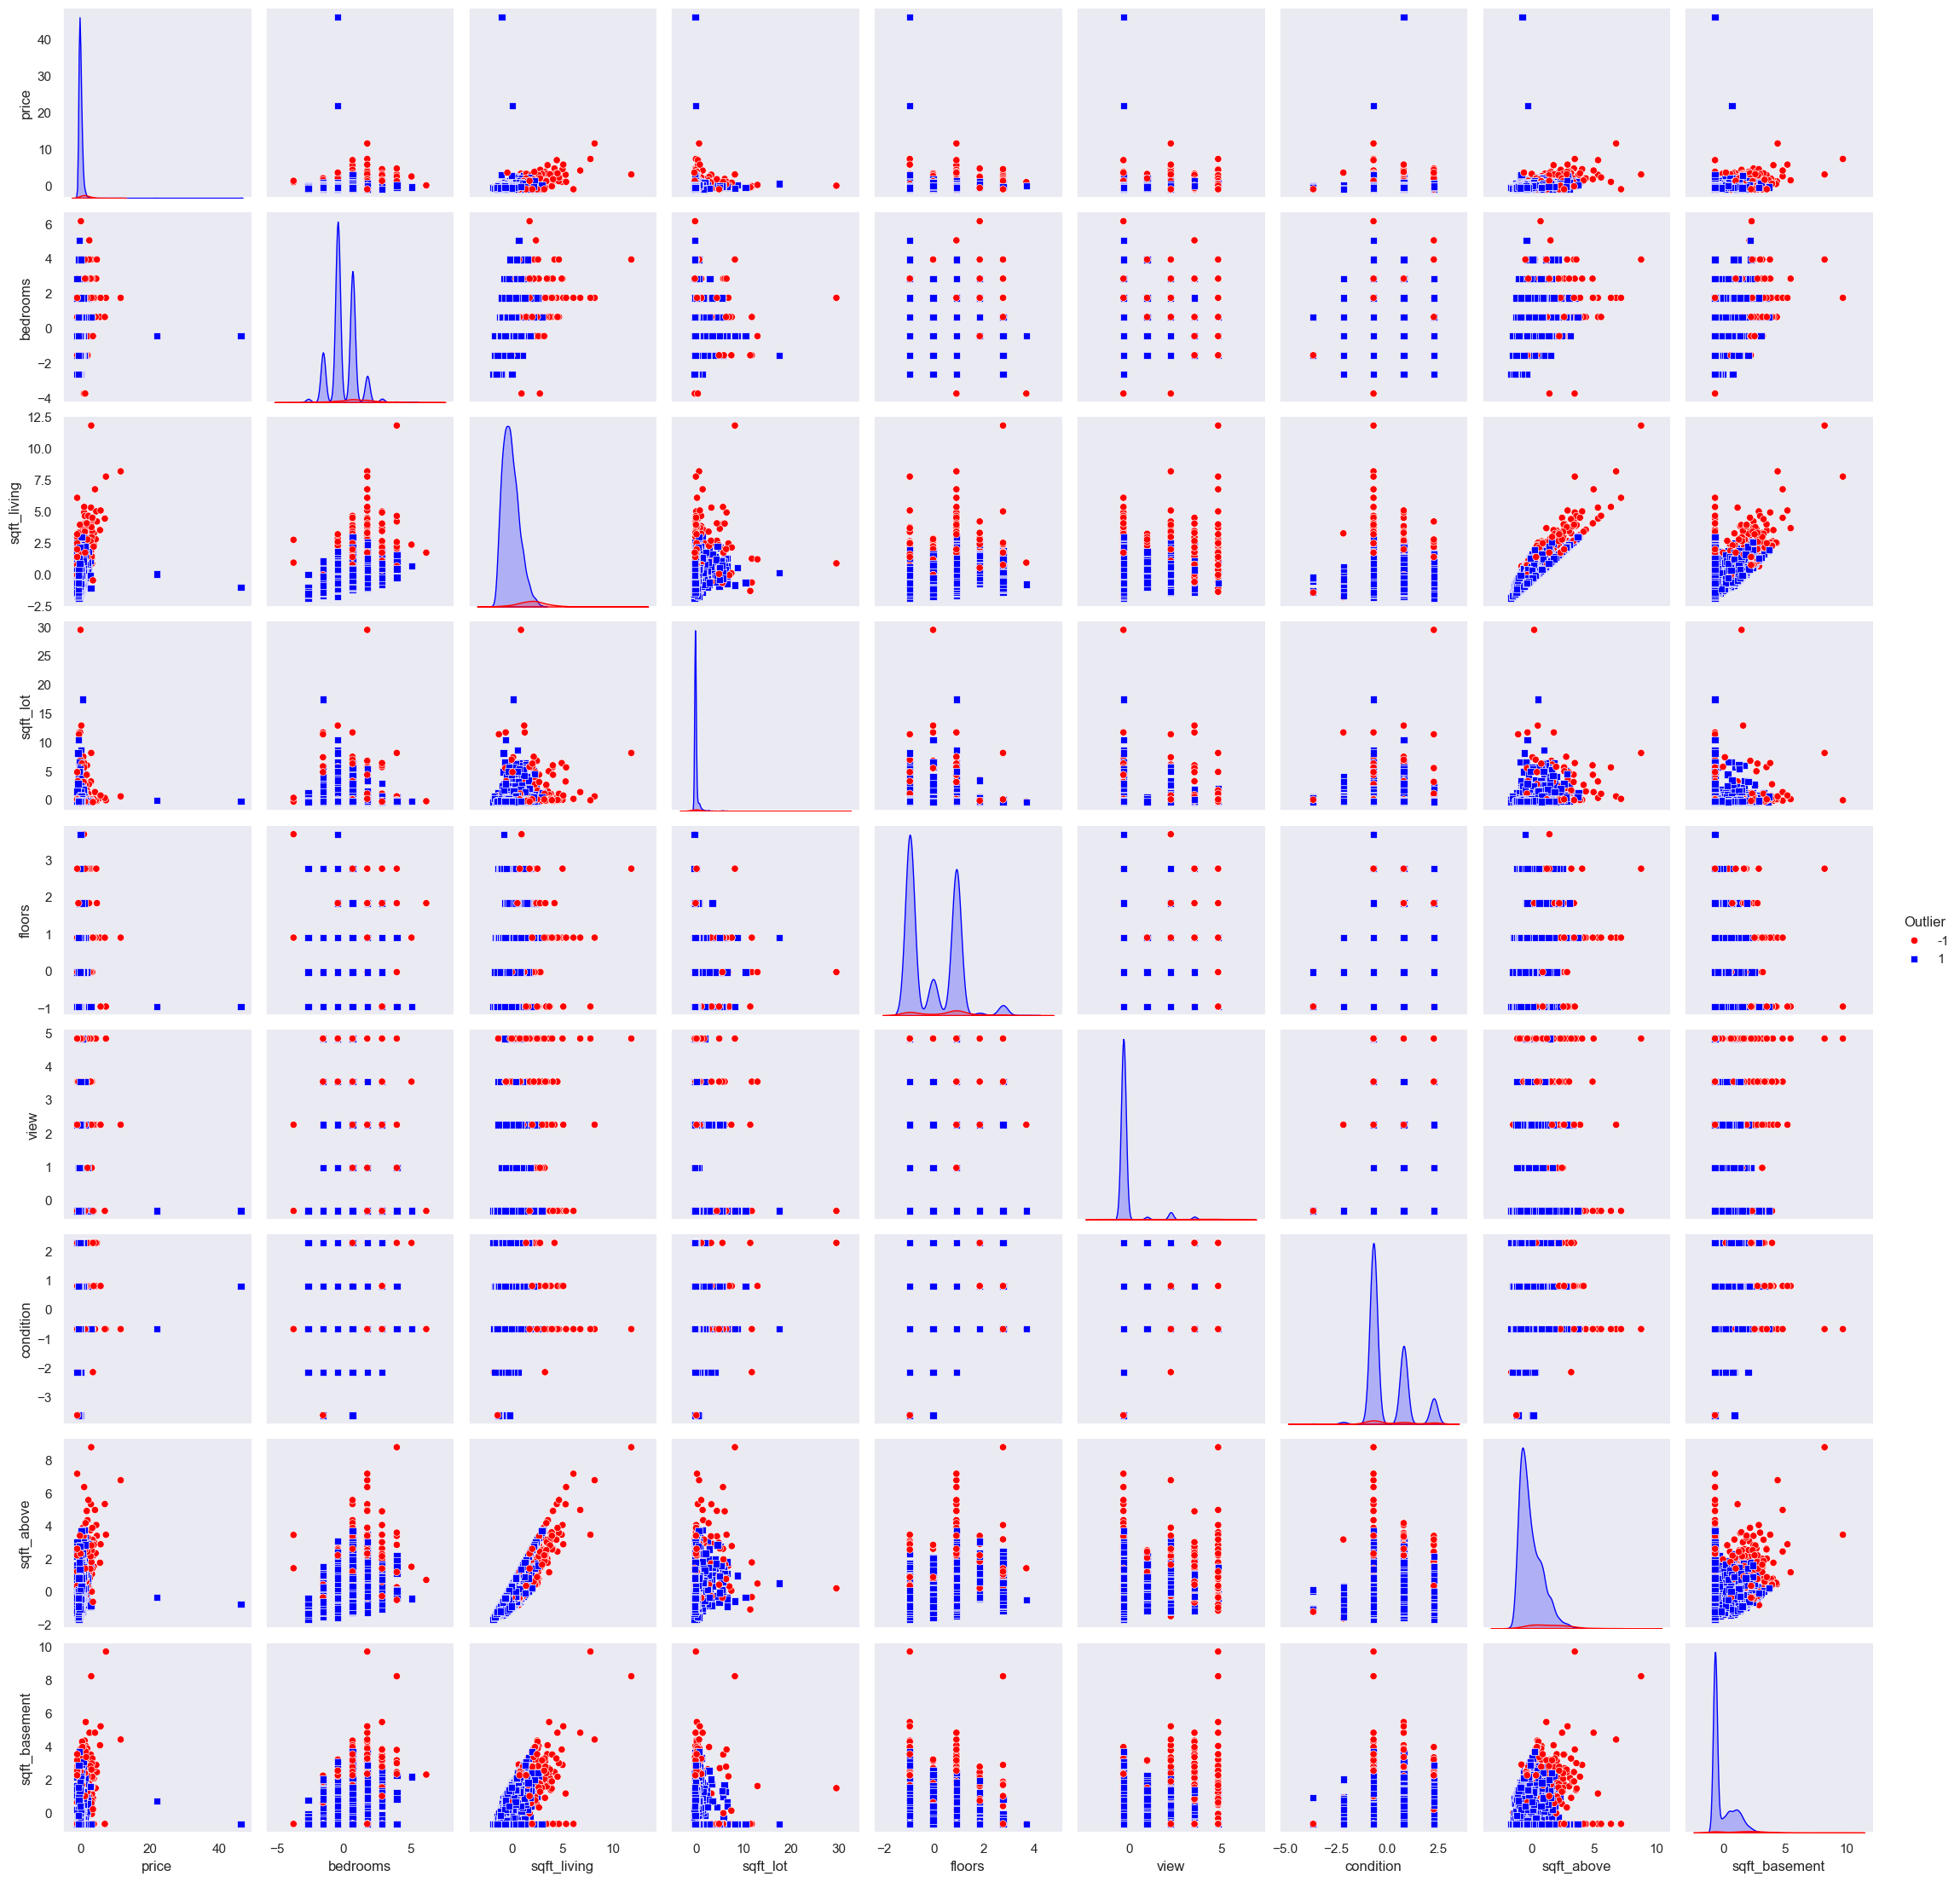

In [86]:
# Add a new column 'Outlier' to the DataFrame indicating whether each row is an outlier or not
dataStdCopy = dataStd.copy()
dataStdCopy['Outlier'] = outlier_predictions

# Create pair plots using seaborn
sns.set(style="dark")
sns.pairplot(dataStdCopy, hue='Outlier', palette={-1: 'red', 1: 'blue'}, markers=['o', 's'], height=2.5)
plt.show()

 Les points bleus représentent les données standard, tandis que les points rouges signalent des valeurs aberrantes. Il y a des distributions asymétriques pour le prix et la surface, comme en témoignent les longues queues sur les histogrammes de densité correspondants. Les nuages de points révèlent des corrélations possibles, par exemple entre le prix et la surface ou le prix mensuel et la surface. Les valeurs aberrantes sont particulièrement notables dans la relation entre le nombre de pièces et les autres variables, ce qui suggère des anomalies spécifiques, comme des appartements exceptionnellement grands ou chers par rapport au reste de l'échantillon.

### Réduction de dimension

In [87]:
pca = PCA()
pca.fit(dataStd)
pca_data = pca.transform(dataStd)
n = dataStd.shape[0] # nb of individuals
p = dataStd.shape[1] # nb of variables
print(n, "samples")
print(p, "variables")

4600 samples
9 variables


In [88]:
explained_variances = pca.explained_variance_
simple_var_proportions = explained_variances / explained_variances.sum()
cumulative_var_proportions = np.cumsum(simple_var_proportions)
labels = [f'PC{i}' for i in range(1, len(explained_variances) + 1)]

summary_table = pd.DataFrame({
    'Explained Variance': explained_variances,
    'Simple Variance Proportion': simple_var_proportions,
    'Cumulative Variance Proportion': cumulative_var_proportions
}, index=labels)

summary_table

,Explained Variance,Simple Variance Proportion,Cumulative Variance Proportion
PC1,3.005944e+00,3.339212e-01,0.333921
PC2,1.699053e+00,1.887427e-01,0.522664
PC3,9.921632e-01,1.102164e-01,0.632880
PC4,9.206131e-01,1.022681e-01,0.735148
PC5,8.244408e-01,9.158462e-02,0.826733
PC6,7.065727e-01,7.849101e-02,0.905224
PC7,4.450889e-01,4.944357e-02,0.954668
PC8,4.080810e-01,4.533247e-02,1.000000
PC9,1.717636e-31,1.908070e-32,1.000000


<BarContainer object of 9 artists>

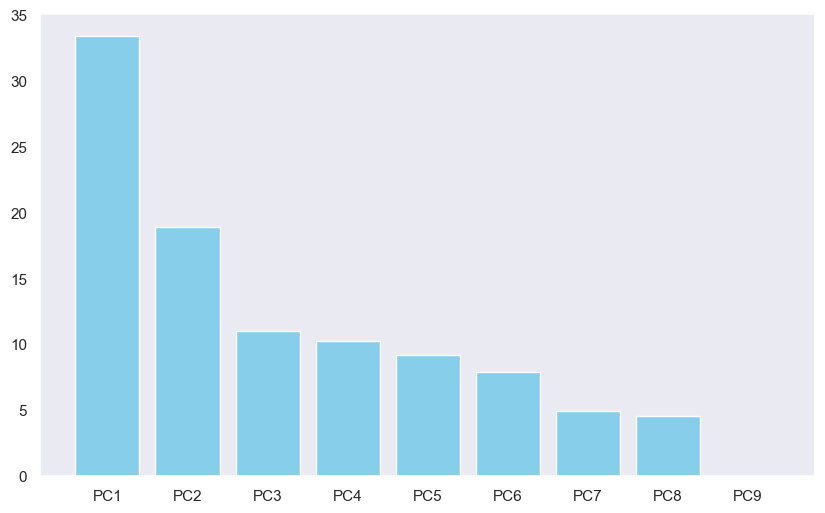

In [89]:
# Convert simple variance proportions to percentages
simple_var_proportions_percent = simple_var_proportions * 100

plt.figure(figsize=(10, 6))
plt.bar(summary_table.index, simple_var_proportions_percent, color='skyblue')

In [90]:
singular_values = np.sqrt(pca.explained_variance_)
corvar_data = {'id': dataStd.columns}
for k in range(p):
    corvar_data[labels[k]] = pca.components_[k,:] * singular_values[k]

coordvar = pd.DataFrame(corvar_data)
coordvar

,id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,price,0.554065,0.142946,-0.182877,0.347606,0.455857,0.531038,0.056265,0.159841,5.459007e-32
1,bedrooms,0.678624,0.138111,-0.094294,-0.530329,-0.138853,-0.072974,0.264866,0.368391,-1.289405e-31
2,sqft_living,0.951718,0.061696,0.011208,-0.097284,-0.053584,0.003308,-0.063350,-0.272322,2.906389e-16
3,sqft_lot,0.252480,0.012731,0.949349,0.083710,-0.005768,0.070479,-0.063444,0.137885,-1.168238e-32
4,floors,0.466085,-0.660095,-0.159501,0.086377,0.129629,-0.275620,-0.404610,0.240576,5.982888e-32
5,view,0.395480,0.388846,-0.061433,0.662945,-0.198921,-0.414532,0.176894,0.081512,1.610688e-32
6,condition,-0.103628,0.607818,0.071053,-0.209087,0.653798,-0.372605,-0.061312,-0.034994,1.492152e-32
7,sqft_above,0.866870,-0.341880,0.065902,-0.061882,0.109254,-0.075912,0.135378,-0.296098,-2.601516e-16
8,sqft_basement,0.364791,0.763102,-0.099158,-0.086940,-0.314149,0.147877,-0.382941,-0.015116,-1.400492e-16


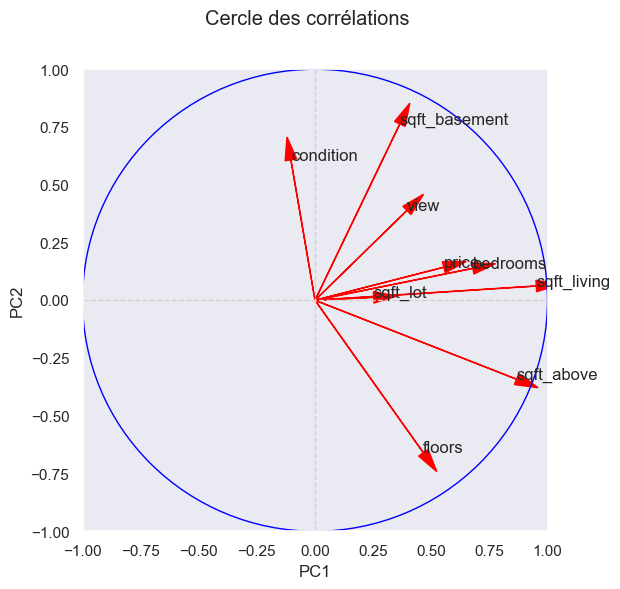

In [91]:
fig, axes = plt.subplots(figsize=(6, 6))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Ajout des titres
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')

# Ajout des axes
axes.axvline(x=0, color='lightgray', linestyle='--', linewidth=1)
axes.axhline(y=0, color='lightgray', linestyle='--', linewidth=1)

# Ajout des noms des variables et des flèches
for j in range(p):
    axes.arrow(0, 0, coordvar[labels[0]][j], coordvar[labels[1]][j], head_width=0.05, head_length=0.1, fc='red', ec='red')
    axes.text(coordvar[labels[0]][j], coordvar[labels[1]][j], coordvar["id"][j])

# Ajout du cercle
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
axes.add_artist(circle)

plt.show()

Le prix d'achat et la surface habitable sont étroitement liés à PC1, indiquant que généralement, une plus grande surface implique un prix plus élevé pour les biens immobiliers. Le loyer mensuel est aussi lié au PC1, mais dans une moindre mesure, suggérant que d’autres éléments influencent également le loyer au-delà de la surface de la propriété. D'autre part, l'arrondissement montre une corrélation plus marquée avec la deuxième composante principale (PC2), ce qui suggère qu'il affecte les valeurs immobilières d'une manière qui ne se résume pas uniquement à une augmentation de la surface ou du prix. Le nombre de pièces a une influence sur les deux composantes, bien que moins prépondérante que la surface ou le prix. Toutes ces variables sont relativement proches du cercle de corrélation, ce qui indique qu'elles sont assez bien représentées par ces deux composantes principales, bien qu'une certaine quantité d'informations soit perdue, comme le montre le fait qu'aucune variable n'est parfaitement alignée sur le cercle.

(4600, 9)

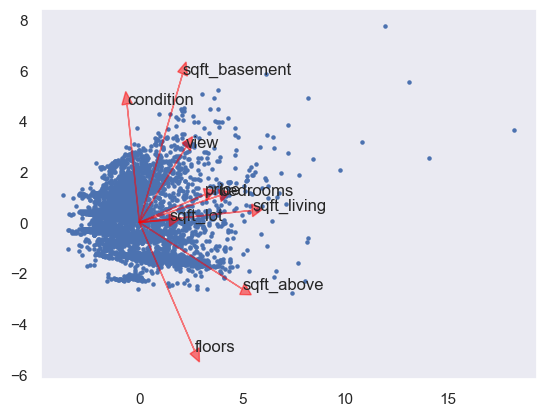

In [92]:
plt.scatter(pca_data[:,0],pca_data[:,1],s=5)
for i in range(pca.components_.shape[1]):
    plt.arrow(0,0,pca.components_[0,i]*10,pca.components_[1,i]*10,alpha=0.5, color='red', head_width=0.5, head_length=0.5)
    plt.text(pca.components_[0,i]*10,pca.components_[1,i]*10,dataStd.columns[i])

pca_data.shape

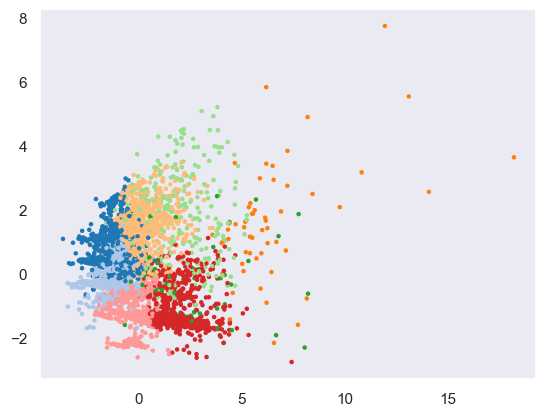

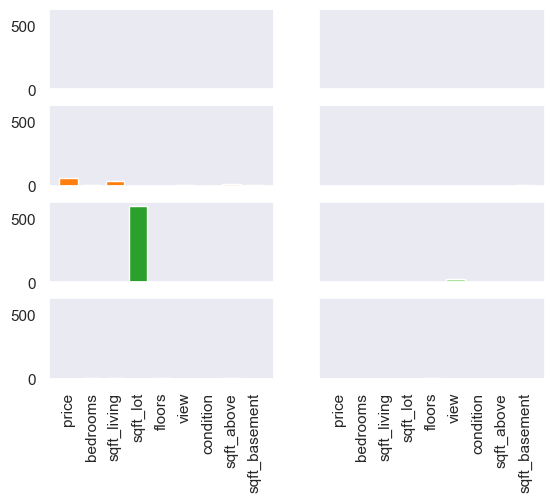

In [93]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)
km.n_clusters = 8
pred = km.fit_predict(pca_data)
plt.scatter(pca_data[:,0],pca_data[:,1],color = [plt.cm.tab20.colors[pred[i]] for i in range(len(pca_data))],s=5)
real_centers = np.exp(pca.inverse_transform(km.cluster_centers_))
fig, axs = plt.subplots(km.n_clusters//2, 2, sharey=True,sharex=True)
for i,k in enumerate(real_centers):
    axs.flatten()[i].bar(range(len(k)),k,color=plt.cm.tab20.colors[i])
    axs.flatten()[i].set_xticks(range(len(k)))
    axs.flatten()[i].set_xticklabels(dataStd.columns,rotation="vertical")

tab20 = plt.get_cmap('tab20')

/usr/local/anaconda3/envs/venv_ml/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/anaconda3/envs/venv_ml/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/var/folders/jl/05xr553n44v3_nqnn57t0f380000gn/T/ipykernel_14671/1985357790.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(iso_data[:, 0], iso_data[:, 1], cmap='tab20', edgecolor='k', color = [plt.cm.tab20.colors[pred[i]] for i in range(len(pca_data))])


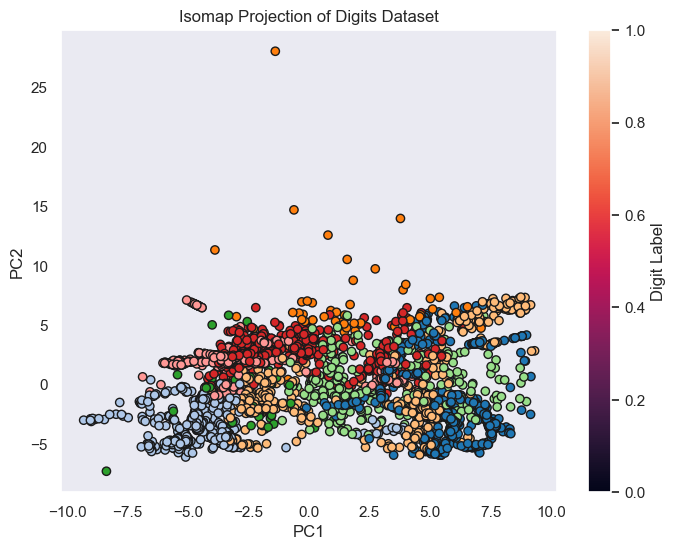

In [94]:
#ISOMAP
from sklearn.manifold import Isomap
# Apply Isomap to the data
iso = Isomap(n_components=2)  # Specify the number of components (dimensions)
iso_data = iso.fit_transform(data_scaled)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(iso_data[:, 0], iso_data[:, 1], cmap='tab20', edgecolor='k', color = [plt.cm.tab20.colors[pred[i]] for i in range(len(pca_data))])
plt.colorbar(label='Digit Label')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Isomap Projection of Digits Dataset')
plt.show()

In [97]:
# #MDS
# from sklearn.manifold import MDS
# # Apply MDS to the data
# mds = MDS(n_components=2)  # Specify the number of components (dimensions)
# mds_data = mds.fit_transform(data_scaled)

# plt.figure(figsize=(8, 5))
# plt.scatter(mds_data[:, 0], mds_data[:, 1], cmap='tab20', edgecolor='k', color = [plt.cm.tab20.colors[pred[i]] for i in range(len(pca_data))])
# plt.colorbar(label='Digit Label')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('MDS Projection of Digits Dataset')
# plt.show()

# TROP LONG, déjà 7 min à exécuter

KeyboardInterrupt: 

La couleur des points varie progressivement, reflétant la continuité et la gradation des chiffres. Malgré cette distinction, un certain chevauchement existe, indiquant une similitude dans la représentation de certains chiffres, ce qui pourrait compliquer leur différenciation. De plus, la dispersion variable parmi les clusters révèle la diversité dans la représentation des chiffres, et les points isolés suggèrent la présence d'anomalies ou de variations inhabituelles au sein des données.

/var/folders/jl/05xr553n44v3_nqnn57t0f380000gn/T/ipykernel_14671/1321184982.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_data[:, 0], tsne_data[:, 1], cmap='tab20', edgecolor='k', color = [plt.cm.tab20.colors[pred[i]] for i in range(len(pca_data))])


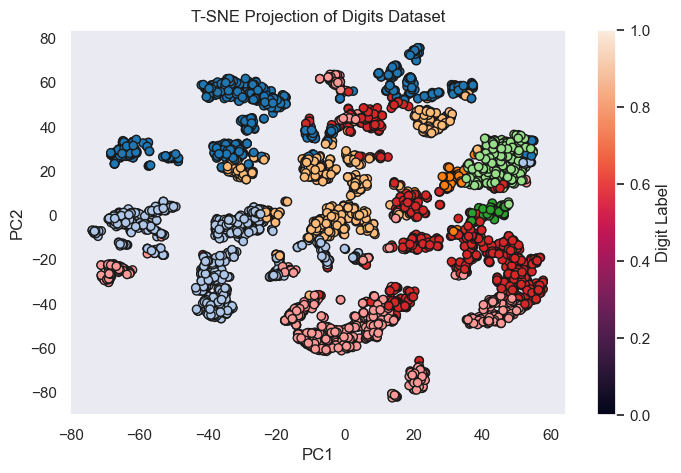

In [96]:
#TSNE
from sklearn.manifold import TSNE
# Apply t-SNE to the data
tsne = TSNE(n_components=2)  # Specify the number of components (dimensions)
tsne_data = tsne.fit_transform(data_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], cmap='tab20', edgecolor='k', color = [plt.cm.tab20.colors[pred[i]] for i in range(len(pca_data))])
plt.colorbar(label='Digit Label')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('T-SNE Projection of Digits Dataset')
plt.show()


Contrairement aux précédentes projections, celle-ci semble offrir une séparation plus claire entre les différents clusters, ce qui suggère que T-SNE est très efficace pour maintenir localement les similitudes et les distinctions entre les données. Les clusters sont distinctement séparés et ordonnés, ce qui témoigne de la puissance de T-SNE à dévoiler des structures cachées au sein de grandes ensembles de données complexes, comme les chiffres manuscrits.